Image __Moment__ is a weighted average of image pixel intensities. 

It is useful to describe some propertiees of the detected contours.

Three types of moments:

- Spatial moments

- Central Moments invariant with respect to translations. Suitable for describing form of objects. 

(Both __Spatial and Central Moemnts are not scale invariant__)

- Normalized Central Moments - invaraint to both scale and translation

In [40]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

In [41]:
def aspect_ratio(contour):

    """Returns the aspect ratio of the contour based on the dimensions of the bounding act"""

    x, y, w, h = cv2.boundingRect(contour)

    result = float(w) /h 
    return result

__Roundness__ is a measure of how closely a contour approachaes the contour of a perfect circle

In [42]:
def roundedness(contour, moments):

    """Calculates the Roundness of Contour"""

    length = cv2.arcLength(contour, True)
    k = (length * length) / (moments['m00'] * 4 * np.pi)

    return k

Eccentricity is a measure of how elongated a contour can be.

In [43]:
def eccentricity_from_ellipse(contour):

    """Calculates the eccentricity fitting an ellipse from a contour"""

    (x, y), (MA, ma), angle = cv2.fitEllipse(contour)

    a = ma /2
    b = MA /2
    
    ecc = np.sqrt(a ** 2 - b **2) /a 
    return ecc 

In [44]:
def eccentricity_from_moments(moments):
    """Calculates the eccentricity from the moments of the contour """

    a1 = (moments['mu20'] + moments['mu02']) /2
    a2 = np.sqrt(4 * moments['mu11'] **2 + (moments['mu20']) ** 2) /2
    ecc = np.sqrt(1 - (a1-a2) / (a1+a2))

    return ecc

In [45]:
def get_one_contour():

    """Returns a fixed Contour"""

    counts = [np.array(
        [[[600, 320]], [[563, 460]], [[460, 562]], [[320, 600]], [[180, 563]], [[78, 460]], [[40, 320]], [[77, 180]],
         [[179, 78]], [[319, 40]], [[459, 77]], [[562, 179]]], dtype=np.int32)]
    return counts

In [46]:
def array_to_tuple(arr):

    return tuple(arr.reshape(1, -1)[0])

In [47]:
def draw_contour_points(img, counts, color):

    for count in counts:
        squeeze = np.squeeze(count)

        for p in squeeze:
            pp = array_to_tuple(p)
            cv2.circle(img, pp, 10, color, -1)
    return img

In [48]:
def draw_contour_outline(img, counts, color, thickness=1):

    for count in counts:
        cv2.drawContours(img, [count], 0, color, thickness)

In [49]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]
    
    ax = plt.subplot(1, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

In [50]:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("Image Contours (Moments Analysis)")
plt.rcParams['figure.facecolor'] = 'silver'


<Figure size 864x360 with 0 Axes>

In [51]:
# Create the canvas (black image with three channels):
canvas = np.zeros((640, 640, 3), dtype="uint8")

# Get a sample contours:
contours = get_one_contour()
print("'detected' contours: '{}' ".format(len(contours)))

'detected' contours: '1' 


In [52]:
# Create copy images to show the different results:
image_contour_points = canvas.copy()
image_contour_outline = canvas.copy()
image_contour_points_outline = canvas.copy()

In [53]:
# Drawing only contour points:
draw_contour_points(image_contour_points, contours, (255, 0, 255))
draw_contour_outline(image_contour_outline, contours, (0, 255, 255), -1)

In [54]:
# Drawing both contour outline and points:
draw_contour_outline(image_contour_points_outline, contours, (255, 0, 0), 3)
draw_contour_points(image_contour_points_outline, contours, (0, 0, 255))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [55]:
# Calculating image moments of the detected contour
M = cv2.moments(contours[0])
print("moments calculated from the detected contour: {}".format(M))

# 1) Calculate/show contour area using both cv2.contourArea() or m00 moment:
print("Contour area: '{}'".format(cv2.contourArea(contours[0])))
print("Contour area: '{}'".format(M['m00']))

# 2) Calculate centroid:
x_centroid = round(M['m10'] / M['m00'])
y_centroid = round(M['m01'] / M['m00'])
print("center X : '{}'".format(x_centroid))
print("center Y : '{}'".format(y_centroid))

# Draw circle based on the centroid coordinates:
cv2.circle(image_contour_points, (x_centroid, y_centroid), 10, (255, 255, 255), -1)

# 3) Calculate roundness (k):
# roundness (k) = (perimeter * perimeter) / (Area * 4 * PI):
# Therefore k for a circle is equal 1, for other objects > 1.
k = roundedness(contours[0], M)
print("roundness: '{}'".format(k))

# 4) Calculate eccentricity using both provided formulas:
em = eccentricity_from_moments(M)
print("eccentricity: '{}'".format(em))
ee = eccentricity_from_ellipse(contours[0])
print("eccentricity: '{}'".format(ee))

# 5) Calculate the aspect ratio of the contour:
ar = aspect_ratio(contours[0])
print("aspect ratio: '{}'".format(ar))

moments calculated from the detected contour: {'m00': 235283.0, 'm10': 75282991.16666666, 'm01': 75279680.83333333, 'm20': 28496148988.333332, 'm11': 24089788592.25, 'm02': 28492341886.0, 'm30': 11939291123446.25, 'm21': 9118893653727.8, 'm12': 9117775940692.967, 'm03': 11936167227424.852, 'mu20': 4408013598.184406, 'mu11': 2712402.277420044, 'mu02': 4406324849.628765, 'mu30': 595042037.7265625, 'mu21': -292162222.4824219, 'mu12': -592577546.1586914, 'mu03': 294852334.5449219, 'nu20': 0.07962727021646843, 'nu11': 4.8997396280458296e-05, 'nu02': 0.07959676431294238, 'nu30': 2.2160077537124397e-05, 'nu21': -1.0880470778779139e-05, 'nu12': -2.2068296922023203e-05, 'nu03': 1.0980653771087236e-05}
Contour area: '235283.0'
Contour area: '235283.0'
center X : '320'
center Y : '320'
roundness: '1.023501338446455'
eccentricity: '0.8165489265216174'
eccentricity: '0.03434020681204824'
aspect ratio: '1.0'


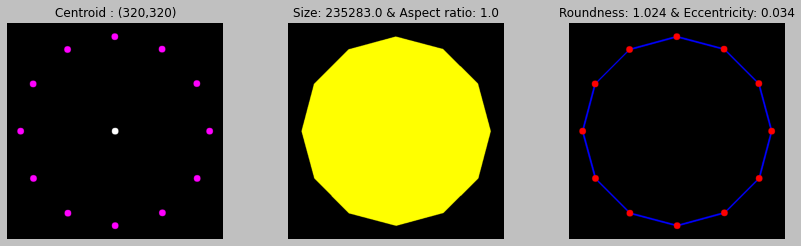

In [59]:
# Plot the images:
img_plt(image_contour_points, "Centroid : (" + str(x_centroid) + "," + str(y_centroid) + ")", 1)
img_plt(image_contour_outline, "Size: " + str(M['m00']) + " & Aspect ratio: " + str(ar), 2)
img_plt(image_contour_points_outline,
                         "Roundness: " + str(round(k, 3)) + " & Eccentricity: " + str(round(ee, 3)), 3)

plt.subplots_adjust(top=3,bottom=1.5, right=2, left=0.2, wspace=0.3, hspace=0.3)
plt.show()